In [8]:
import torch
from torch import nn
from torchmetrics import JaccardIndex

loss = nn.CrossEntropyLoss()
loss2 = nn.functional.cross_entropy
input = torch.randn(14, 4, 10, 10, requires_grad=True)
target = torch.randint(0, 4, size=(14, 10, 10))
output = loss(input, target)
output2 = loss2(input, target)

input_hat = input.softmax(dim=1).argmax(dim=1)

metric = JaccardIndex(ignore_index=0, task="multiclass", num_classes=4, average="micro")
metric(input, target)


tensor(0.1677)

In [3]:
output

tensor(1.7087, grad_fn=<NllLoss2DBackward0>)

In [14]:
output2

tensor(2.3923, grad_fn=<DivBackward1>)

In [8]:
input

tensor([[-0.0581, -0.8119, -0.3896,  0.5721, -0.1333],
        [-0.7342,  1.0222, -0.1043,  1.6946,  0.5277],
        [ 0.7041,  1.2577,  1.4935, -0.4094, -1.6888]], requires_grad=True)

In [9]:
target

tensor([[-1.0966, -0.1250,  0.2427,  1.2198, -1.5362],
        [ 2.7520,  1.1842,  0.4517,  1.1489,  1.2331],
        [ 1.6320,  2.2495,  0.3007, -0.4670, -0.8559]])

Seed set to 4


Loaded 112 images from data/train


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 2.]


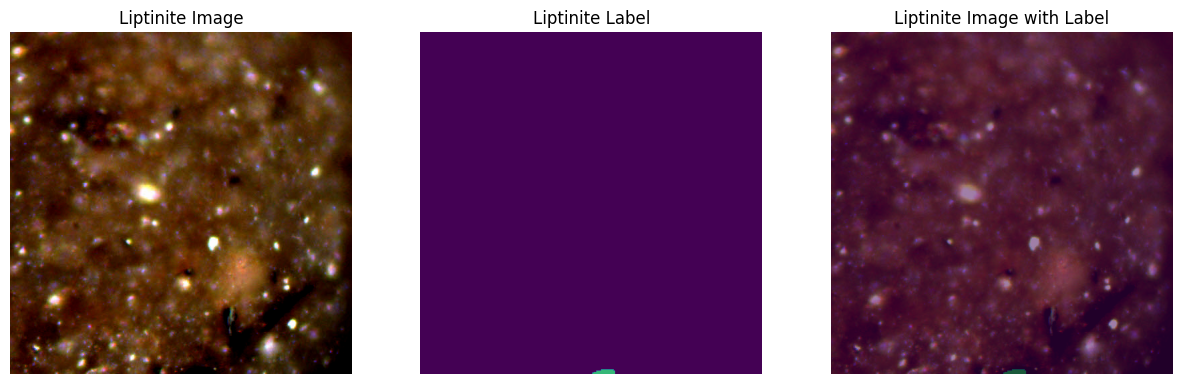

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 1.]


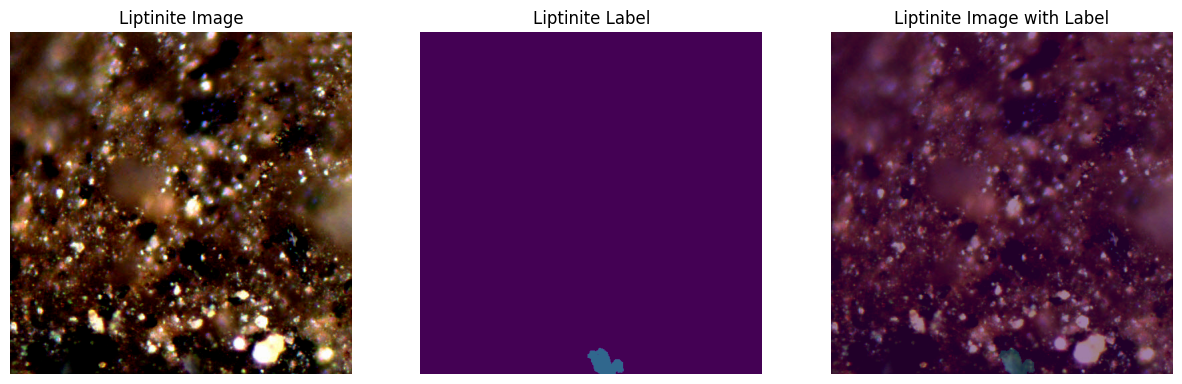

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.]


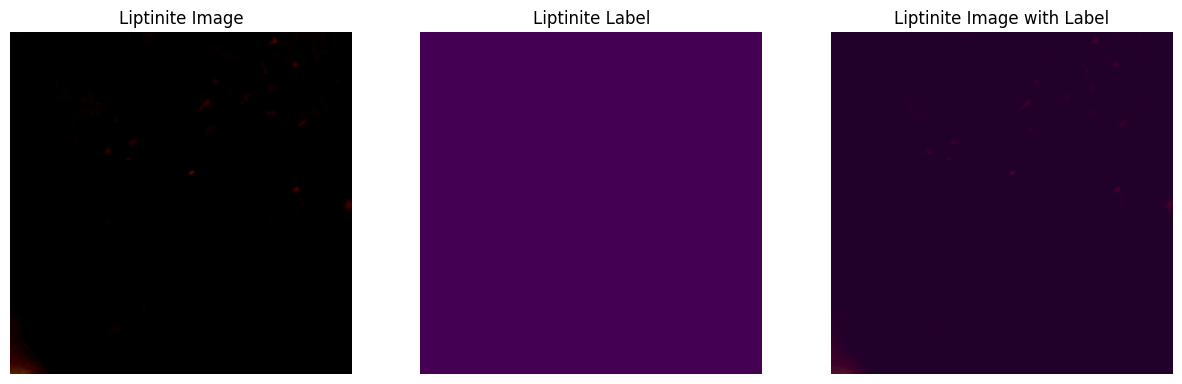

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 3.]


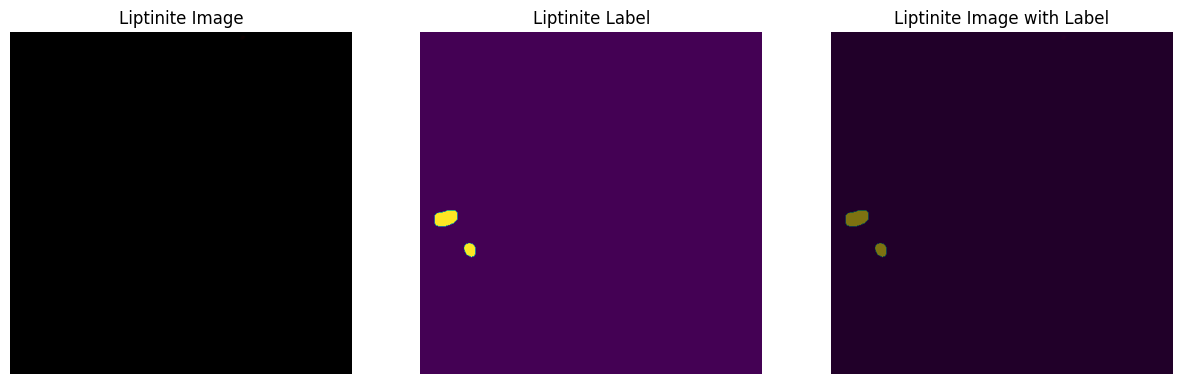

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 2.]


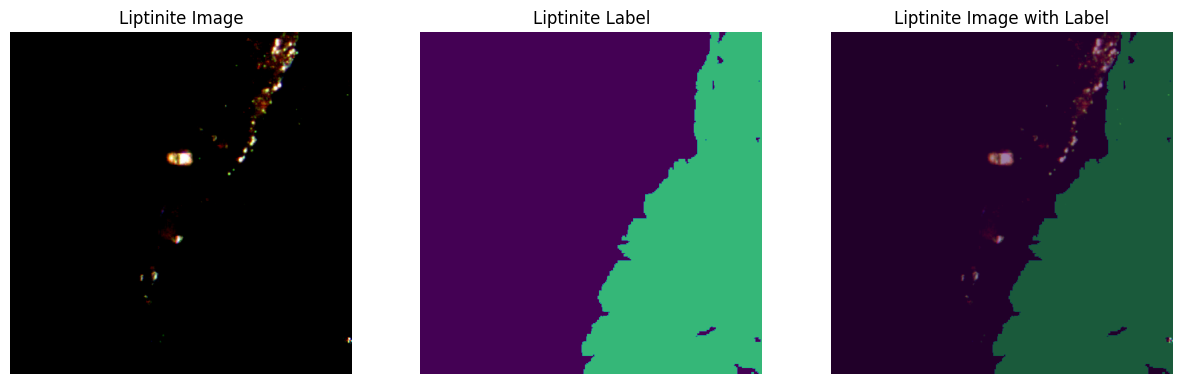

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 2.]


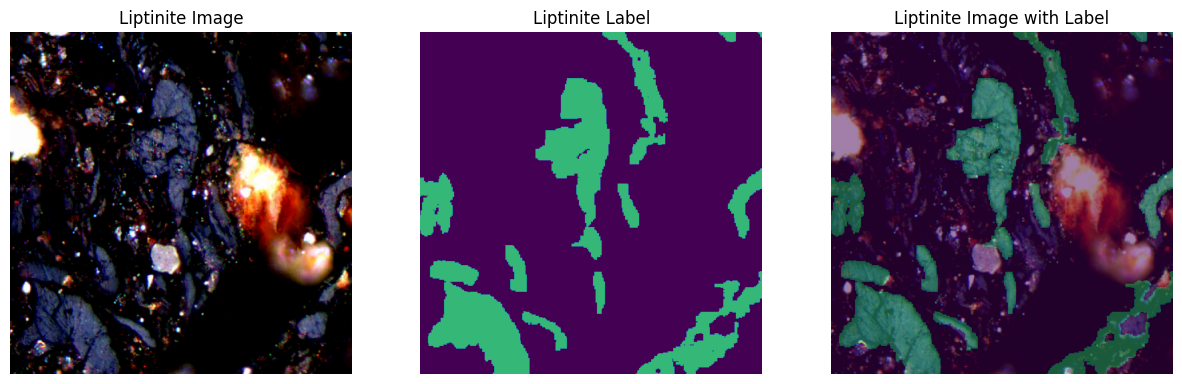

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 3.]


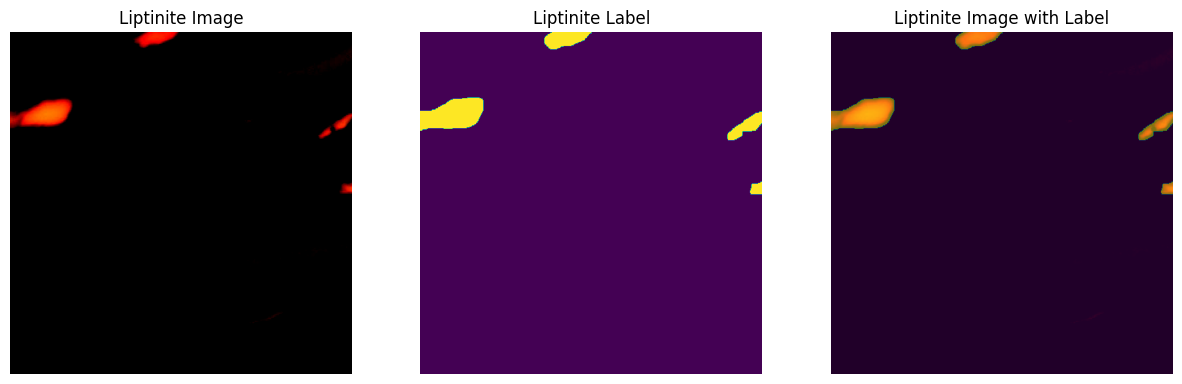

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 3.]


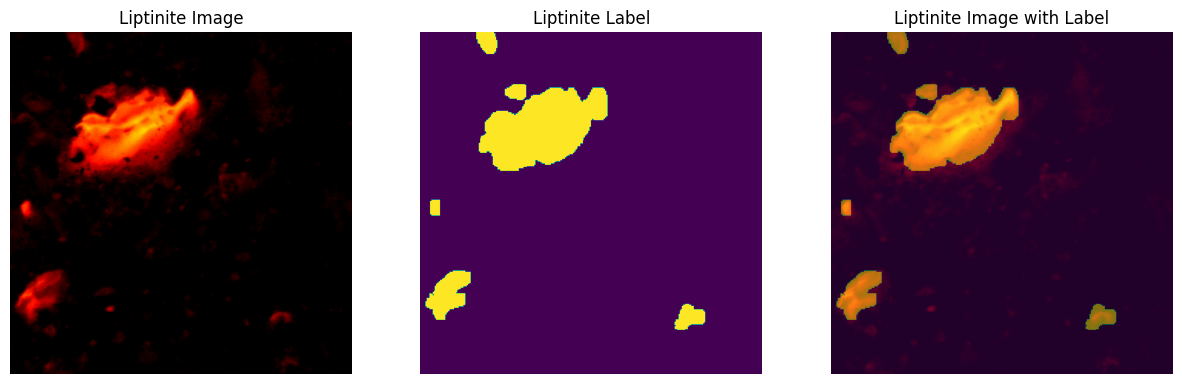

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 1. 2.]


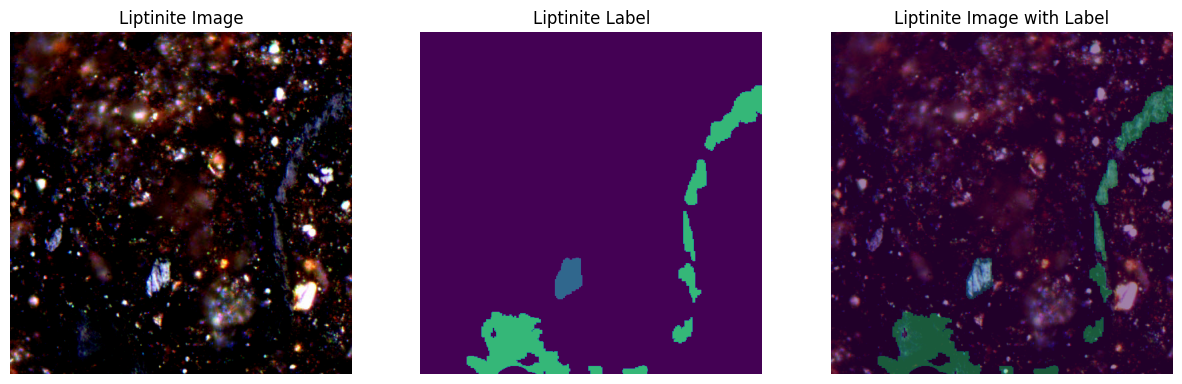

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 3.]


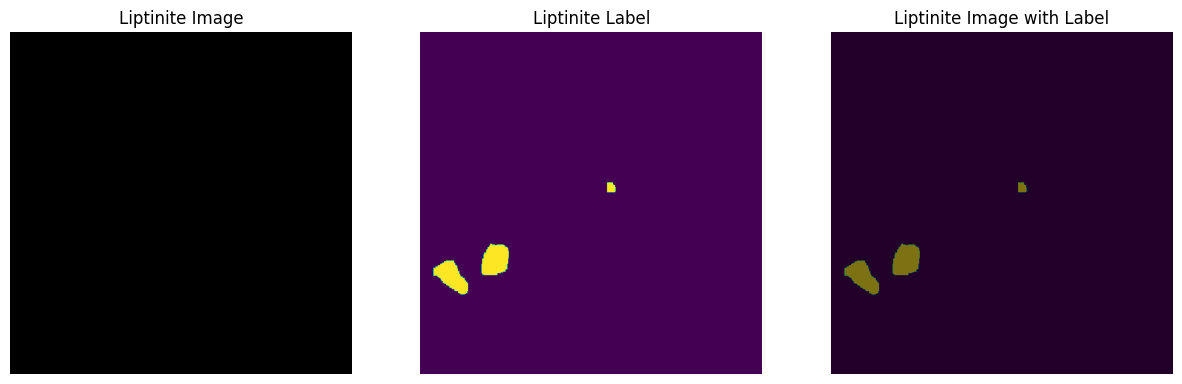

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 3.]


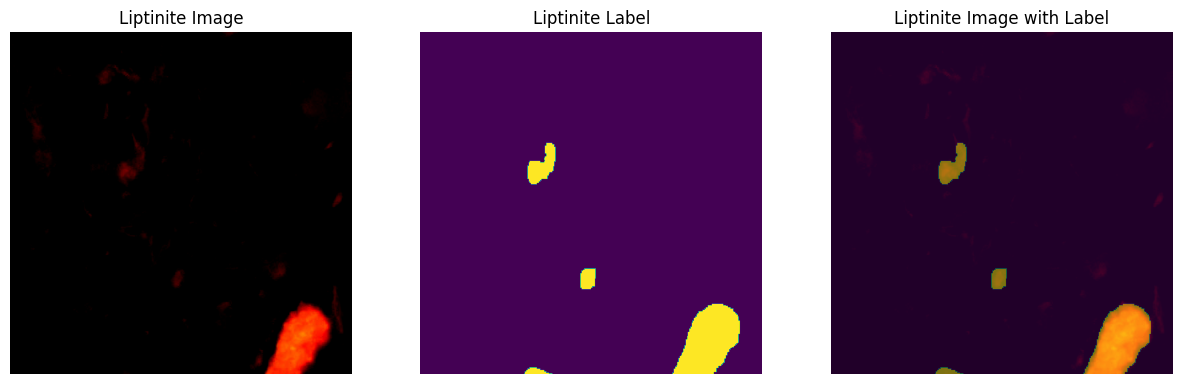

In [1]:
from src.model import FineTuningModel
from src.data import SupervisedDataModule
from lightning.pytorch import seed_everything, Trainer
from lightning.pytorch.tuner import Tuner
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.callbacks import ModelCheckpoint
import torch
import os
import matplotlib.pyplot as plt
import numpy as np


seed_everything(4, workers=True)
dm_class = SupervisedDataModule

dm = dm_class(root="data/train",
              batch_size=1, num_val=0, crop = 512)

dm.setup()
i=0
for batch in dm.train_dataloader():
    img, label = batch  
    
    
    
    # print(img[0].shape])
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(img[0].permute(1, 2, 0))
    ax[0].set_title('Liptinite Image')
    ax[0].axis('off')
    ax[1].imshow(label[0].permute(1, 2, 0), vmin=0, vmax=3)
    ax[1].set_title('Liptinite Label')
    ax[1].axis('off')
    ax[2].imshow(img[0].permute(1, 2, 0))
    ax[2].set_title('Liptinite Image with Label')
    ax[2].axis('off')
    ax[2].imshow(label[0].permute(1, 2, 0), alpha=0.5, vmin=0, vmax=3)
    print(np.unique(label[0]))
    plt.show()
    i+=1
    if i>10:
        break


[0 3]


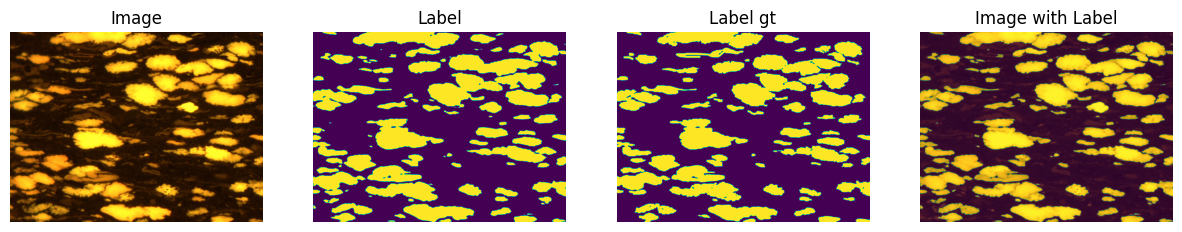

[0 2]


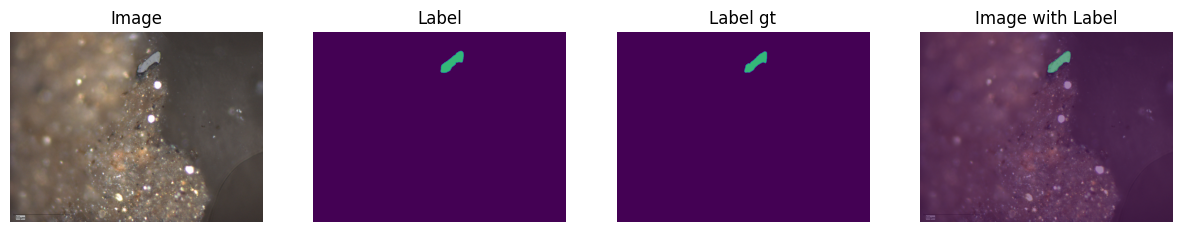

[0 1 2]


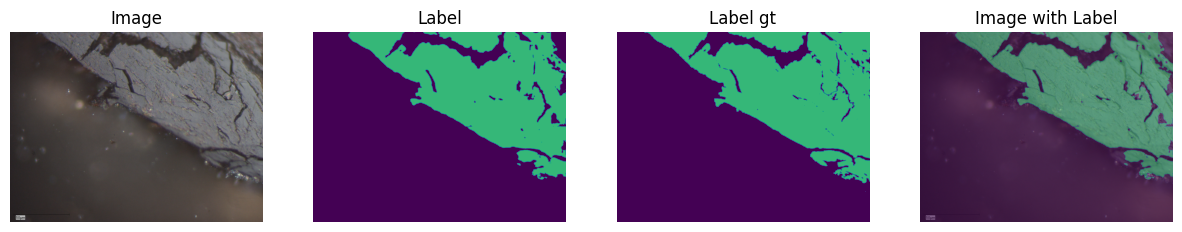

[0 1 2]


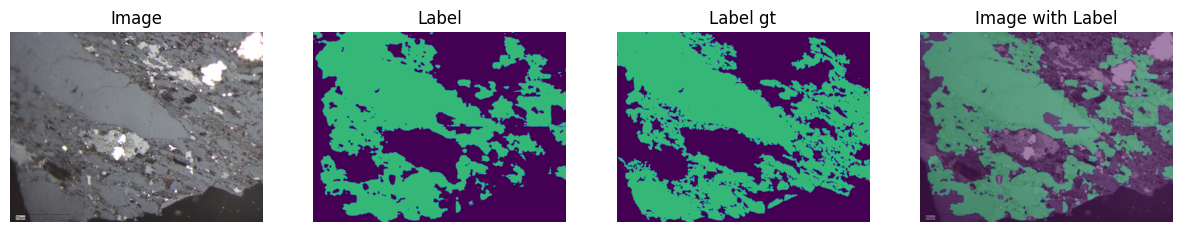

In [1]:
from src.model import FineTuningModel
from src.data import SupervisedDataModule
from lightning.pytorch import seed_everything, Trainer
from lightning.pytorch.tuner import Tuner
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.callbacks import ModelCheckpoint
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


# seed_everything(4, workers=True)
# dm_class = SupervisedDataModule

# dm = dm_class(root="D:/AKairys/DFUC2022/Examples/decoder-denoising/data/train_test",
#               batch_size=1, num_val=0)

# dm.setup()
root = "data/train_test"
images = os.listdir(os.path.join(root, 'image'))
i=0
for im in images:
    img_path = os.path.join(root, 'image', im)
    img = Image.open(img_path)  
    # mask path
    mask_path = img_path.replace('image', 'label').replace(".jpg","_pred.npy").replace(".JPG", "_pred.npy")  
    label = np.load(mask_path)#.squeeze(0)
    
    mask_path = img_path.replace('train_test', 'train').replace('image', 'label').replace(".jpg","_gt.npy").replace(".JPG", "_gt.npy")  
    if os.path.exists(mask_path):
        gt = np.load(mask_path)
    else:
        gt = np.zeros(label.shape)

    
    
    # print(img[0].shape])
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    ax[0].imshow(img)
    ax[0].set_title('Image')
    ax[0].axis('off')
    ax[1].imshow(label, vmin=0, vmax=3)
    ax[1].set_title('Label')
    ax[1].axis('off')
    ax[2].imshow(gt, vmin=0, vmax=3)
    ax[2].set_title('Label gt')
    ax[2].axis('off')
    ax[3].imshow(img)
    ax[3].set_title('Image with Label')
    ax[3].axis('off')
    ax[3].imshow(label, alpha=0.5, vmin=0, vmax=3)
    print(np.unique(label))
    plt.show()
    i+=1
    if i>3:
        break


In [1]:
from src.model import FineTuningModel
from src.data import SplitMaskDataModule
from lightning.pytorch import seed_everything, Trainer
from lightning.pytorch.tuner import Tuner
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.callbacks import ModelCheckpoint
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


seed_everything(4, workers=True)
dm_class = SplitMaskDataModule

dm = dm_class(root="data/stranger-sections-2-unlabeled-data",
              batch_size=1, num_val=0, crop = 512)

dm.setup()
i=0
for batch in dm.train_dataloader():
    img1, img2, img, mask = batch    
    mask = Image.fromarray(mask)
    
    
    # print(img[0].shape])
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    ax[0].imshow(img[0].permute(1, 2, 0))
    ax[0].set_title('Image')
    ax[0].axis('off')
    ax[1].imshow(img1[0].permute(1, 2, 0))
    ax[1].set_title('Image1')
    ax[1].axis('off')
    ax[2].imshow(img2[0].permute(1, 2, 0))
    ax[2].set_title('Image2')
    ax[2].axis('off')    
    ax[3].imshow(mask[0])
    ax[3].set_title('Mask')
    ax[3].axis('off')
    plt.show()
    i+=1
    if i>3:
        break


Seed set to 4


Loaded 8640 images from data/stranger-sections-2-unlabeled-data


AttributeError: 'Tensor' object has no attribute '__array_interface__'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)
False
True


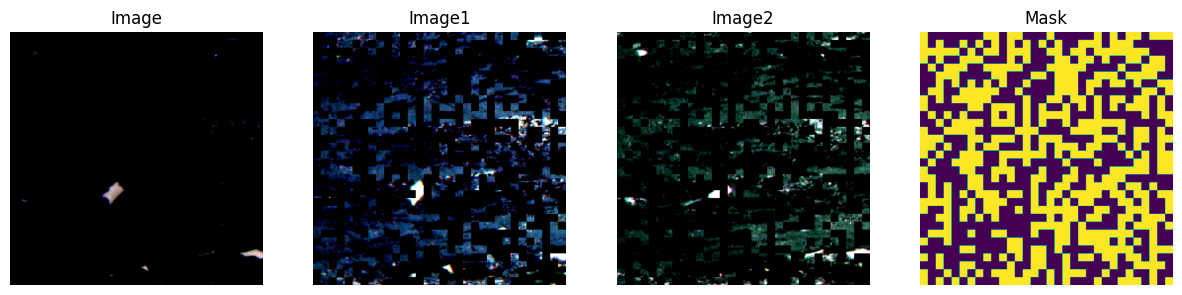

In [20]:
from src.model import FineTuningModel
from src.data import SplitMaskDataModule
from lightning.pytorch import seed_everything, Trainer
from lightning.pytorch.tuner import Tuner
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.callbacks import ModelCheckpoint
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from glob import glob
from typing import Callable
import numpy as np

import lightning as pl
import torch
import torch.utils.data as data
from PIL import Image
from torch.utils.data import DataLoader
from torchvision.transforms import (Compose, Lambda, RandomCrop,
                                    RandomHorizontalFlip, Resize, 
                                    ToTensor, Normalize, ColorJitter, 
                                    RandomApply, RandomGrayscale)

path = 'data/stranger-sections-2-unlabeled-data/0a6odx.jpg'

tile_size = 16
def get_mask(image):
    tile = (tile_size, tile_size)
    tilen = image.shape[-2]//tile_size
    # Create a mask
    mask = np.zeros((tilen, tilen), dtype=bool)

    # Flatten the mask to make it a 1D array
    flat_mask = mask.flatten()

    # Randomly set 50% of the pixels to True
    num_true_pixels = flat_mask.size // 2
    random_indices = np.random.choice(flat_mask.size, 
                                        size=num_true_pixels, 
                                        replace=False)
    flat_mask[random_indices] = True

    # Reshape the flattened mask back to its original shape
    mask = flat_mask.reshape((tilen, tilen))
    mask = np.kron(mask, np.ones(tile)).astype(bool)
    return mask
s=1
color_jitter = ColorJitter(0.8 * s, 0.8 * s, 0.8 * s, 0.2 * s)
transf = [
            # do not use any geometric transforms, because then alignment after encoder is not meaningful
            # transforms.RandomResizedCrop(size=size),
            # transforms.RandomHorizontalFlip(),
            RandomCrop(512),
            RandomApply([color_jitter], p=0.8),
            RandomGrayscale(p=0.2),
            ToTensor(),
            Normalize(mean=[0.5]*3, std=[0.5]*3)
            ]

# for views we use all transforms except cropping
transformsX = Compose(transf[1:])
# for original image we do not use photometric transforms
transforms = Compose(transf[-2:])
# for image mask we do not use any transform, just convertion to tensor
transformsM = Compose(transf[-2])
# crop operation
cropT = transf[0]

img_path = path
# load image
img = Image.open(img_path).convert("RGB")
# create a crop
img = cropT(img)
img_ = np.array(img)
# create mask
print(img_.shape)
mask = get_mask(img_)
print(mask.min())
print(mask.max())
# apply mask twice
img1, img2 = img_.copy(), img_.copy()
img1[mask, :] = 0
img2[~mask, :] = 0

img1, img2, img, mask = transformsX(Image.fromarray(img1)), transformsX(Image.fromarray(img2)), \
            transforms(img), transformsM(mask)

# print(img[0].shape])
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(img.permute(1, 2, 0))
ax[0].set_title('Image')
ax[0].axis('off')
ax[1].imshow(img1.permute(1, 2, 0))
ax[1].set_title('Image1')
ax[1].axis('off')
ax[2].imshow(img2.permute(1, 2, 0))
ax[2].set_title('Image2')
ax[2].axis('off')    
ax[3].imshow(mask)
ax[3].set_title('Mask')
ax[3].axis('off')
plt.show()



In [2]:
!pip install lightning

     -------------------------------------- 53.4/53.4 kB 939.2 kB/s eta 0:00:00
   ---------------------------------------- 2.0/2.0 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: lightning-utilities
    Found existing installation: lightning-utilities 0.7.1
    Uninstalling lightning-utilities-0.7.1:
      Successfully uninstalled lightning-utilities-0.7.1


In [16]:
H, W = 1360, 1024
window_size = 512
stride = 256

# Iterate over rows
for i in range(0, H-stride, stride):
    # print(f'i-{i}')
    # Ensure that the last window covers the remaining part of the image
    if i + window_size > H:
        i = H - window_size
    # Iterate over columns
    for j in range(0, W-stride, stride):
        # print(f'j-{j}')
        # Ensure that the last window covers the remaining part of the image
        if j + window_size > W:
            j = W - window_size
        print(f'{i}:{i+window_size}-{j}:{j+window_size}')


0:512-0:512
0:512-256:768
0:512-512:1024
256:768-0:512
256:768-256:768
256:768-512:1024
512:1024-0:512
512:1024-256:768
512:1024-512:1024
768:1280-0:512
768:1280-256:768
768:1280-512:1024
848:1360-0:512
848:1360-256:768
848:1360-512:1024


Seed set to 4


Loaded 8644 images from data\stranger-sections-2-unlabeled-data


TypeError: 'Axes' object is not subscriptable

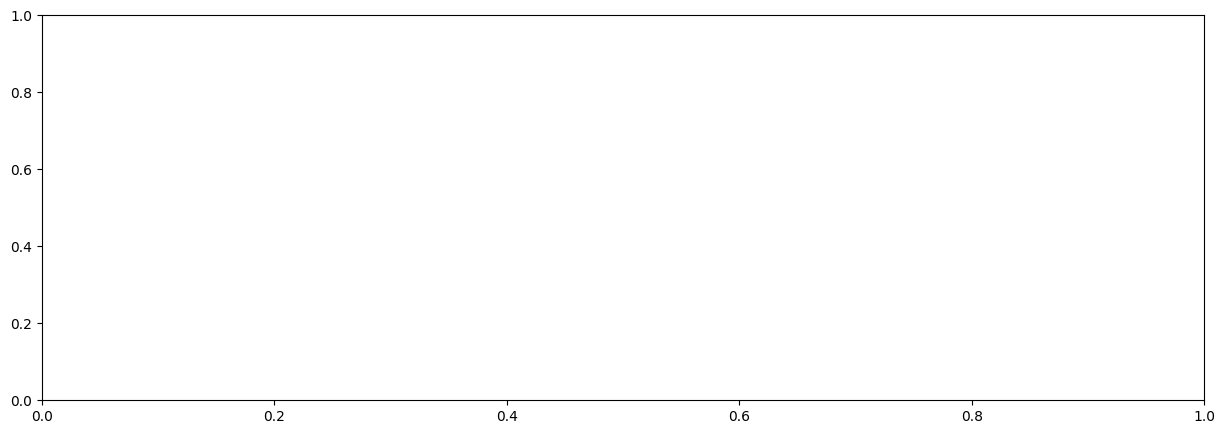

In [1]:
from src.model import FineTuningModel
from src.data import SSLDataModule
from lightning.pytorch import seed_everything, Trainer
from lightning.pytorch.tuner import Tuner
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.callbacks import ModelCheckpoint
import torch
import os
import matplotlib.pyplot as plt
import numpy as np


seed_everything(4, workers=True)
dm_class = SSLDataModule

dm = dm_class(root="data\stranger-sections-2-unlabeled-data",
              batch_size=1, num_val=0, crop=512)

dm.setup()
i=0
for batch in dm.train_dataloader():
    img = batch  
    
    
    
    # print(img[0].shape])
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax[0].imshow(img[0].permute(1, 2, 0))
    ax[0].set_title('Liptinite Image')
    ax[0].axis('off')
    # ax[1].imshow(label[0].permute(1, 2, 0), vmin=0, vmax=3)
    # ax[1].set_title('Liptinite Label')
    # ax[1].axis('off')
    # ax[2].imshow(img[0].permute(1, 2, 0))
    # ax[2].set_title('Liptinite Image with Label')
    # ax[2].axis('off')
    # ax[2].imshow(label[0].permute(1, 2, 0), alpha=0.5, vmin=0, vmax=3)
    print(np.unique(label[0]))
    plt.show()
    i+=1
    if i>10:
        break
